---

In [9]:
import sys
sys.path.append('../') 

---

In [10]:
import numpy as np

In [11]:
from libraries.CrystalStructure import CrystalStructure as Crystal
# Insert a valid file name here
filename = '../../data/fcc100a256.txt'
# Initialize a Crystal object using the from_file method (constructor)
cristallo = Crystal.from_file(filename)

In [12]:
# First set a cutoff radious = 4.5 Angstrom
cristallo.set_R_C(4.5)
# Then find neighbours
cristallo.find_neighbours() 

In [13]:
# setto il seeddo
np.random.seed(12316543)

In [14]:
import libraries.simplified as dynamics

# PASSO 0 #

# calcolo la potenziale iniziale
potenziale_iniziale = dynamics.compute_potential(cristallo)
# inizializzo velocità e calcolo cinetica iniziale
velocità, energia_cinetica = dynamics.random_velocities(cristallo, temp_ini=20)
# calcolo la matrice delle forze iniziali
forza_prima = dynamics.compute_forces_matrix(cristallo)

process_E_tot = []

# CICLO #
for step in range(100):
    # aggiorno posizioni e primi vicini
    dynamics.update_positions(cristallo, velocità, forze=forza_prima, dt=1e-15)
    # aggiorno vicini
    cristallo.find_neighbours()
    # calcolo nuove forze
    forza_dopo = dynamics.compute_forces_matrix(cristallo)
    # aggiorno velocità
    velocità, energia_cinetica = dynamics.update_velocities(cristallo, velocità, forza_prima, forza_dopo, dt=1e-15)
    # ricalcolo potenziale
    potenziale = dynamics.compute_potential(cristallo)
    # calcolo temperatura
    temp = (2/3) * (energia_cinetica / (cristallo.N_atoms * dynamics.k_B))
    
    E_tot_now = potenziale + energia_cinetica
    process_E_tot.append(E_tot_now)
    
    print(f"Step {step}/100: E_T = {E_tot_now:.4f} eV, E_P = {potenziale:.4f} eV, E_K = {energia_cinetica:.4f} eV, T = {temp:.2f} K")


Step 0/100: E_T = -452.7883 eV, E_P = -453.4509 eV, E_K = 0.6626 eV, T = 20.02 K
Step 1/100: E_T = -452.7877 eV, E_P = -453.4507 eV, E_K = 0.6630 eV, T = 20.03 K
Step 2/100: E_T = -452.7864 eV, E_P = -453.4497 eV, E_K = 0.6632 eV, T = 20.04 K
Step 3/100: E_T = -452.7846 eV, E_P = -453.4478 eV, E_K = 0.6632 eV, T = 20.04 K
Step 4/100: E_T = -452.7822 eV, E_P = -453.4450 eV, E_K = 0.6629 eV, T = 20.03 K
Step 5/100: E_T = -452.7791 eV, E_P = -453.4414 eV, E_K = 0.6623 eV, T = 20.01 K
Step 6/100: E_T = -452.7754 eV, E_P = -453.4369 eV, E_K = 0.6615 eV, T = 19.99 K
Step 7/100: E_T = -452.7712 eV, E_P = -453.4316 eV, E_K = 0.6604 eV, T = 19.96 K
Step 8/100: E_T = -452.7663 eV, E_P = -453.4254 eV, E_K = 0.6591 eV, T = 19.92 K
Step 9/100: E_T = -452.7608 eV, E_P = -453.4184 eV, E_K = 0.6576 eV, T = 19.87 K
Step 10/100: E_T = -452.7547 eV, E_P = -453.4106 eV, E_K = 0.6558 eV, T = 19.82 K
Step 11/100: E_T = -452.7481 eV, E_P = -453.4019 eV, E_K = 0.6538 eV, T = 19.76 K
Step 12/100: E_T = -452.74

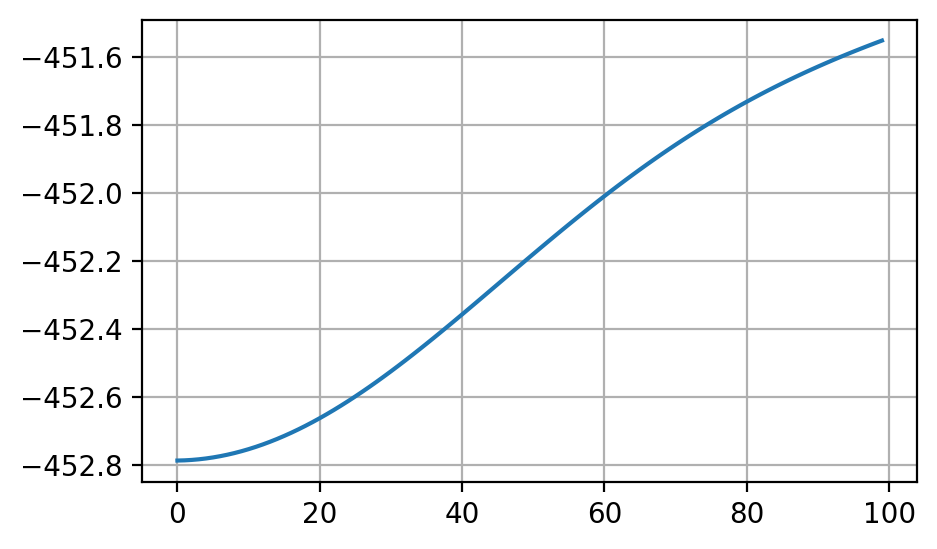

In [15]:
import matplotlib.pyplot as plt
x = np.arange(0, 100, 1)
y = process_E_tot

plt.figure(figsize=(5,3), dpi=200)
plt.plot(x, y)
plt.grid()
plt.show()